In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt

In [2]:
in_dir = '/Volumes/Naamloos/PhD_Data/CMIP6/regression/zoszostoga_zostoga'
models = os.listdir(in_dir)
models = [m for m in models if '.' not in m] 

In [3]:
predictions = []
for m,model in enumerate(models):
    predictions.append(xr.open_dataset(os.path.join(in_dir,model,model+'_zoszostoga_linregression_prediction.nc'),chunks={})[['pctBias_2081_2100','pctBias_2081_2100_ssp_independent']])
prediction_ds = xr.concat(predictions,dim='source_id')
prediction_ds

<xarray.Dataset>
Dimensions:                            (ssp: 5, lat: 181, lon: 360,
                                        source_id: 23)
Coordinates:
  * ssp                                (ssp) object 'ssp119' ... 'ssp585'
  * lat                                (lat) float64 -90.0 -89.0 ... 89.0 90.0
  * lon                                (lon) float64 0.0 1.0 2.0 ... 358.0 359.0
  * source_id                          (source_id) <U15 'ACCESS-CM2' ... 'UKE...
    nav_lon                            float32 ...
    nav_lat                            float32 ...
Data variables:
    pctBias_2081_2100                  (source_id, ssp, lat, lon) float64 dask.array<chunksize=(1, 5, 181, 360), meta=np.ndarray>
    pctBias_2081_2100_ssp_independent  (source_id, ssp, lat, lon) float64 dask.array<chunksize=(1, 5, 181, 360), meta=np.ndarray>

Plot %-bias of predicted dzos relative to simulated dzos (2081-2100 minus 1995-2014):

In [7]:
ssp_to_plot = 'ssp585'

Bias when predicting using regression coefficients fitted with specifically this SSP:

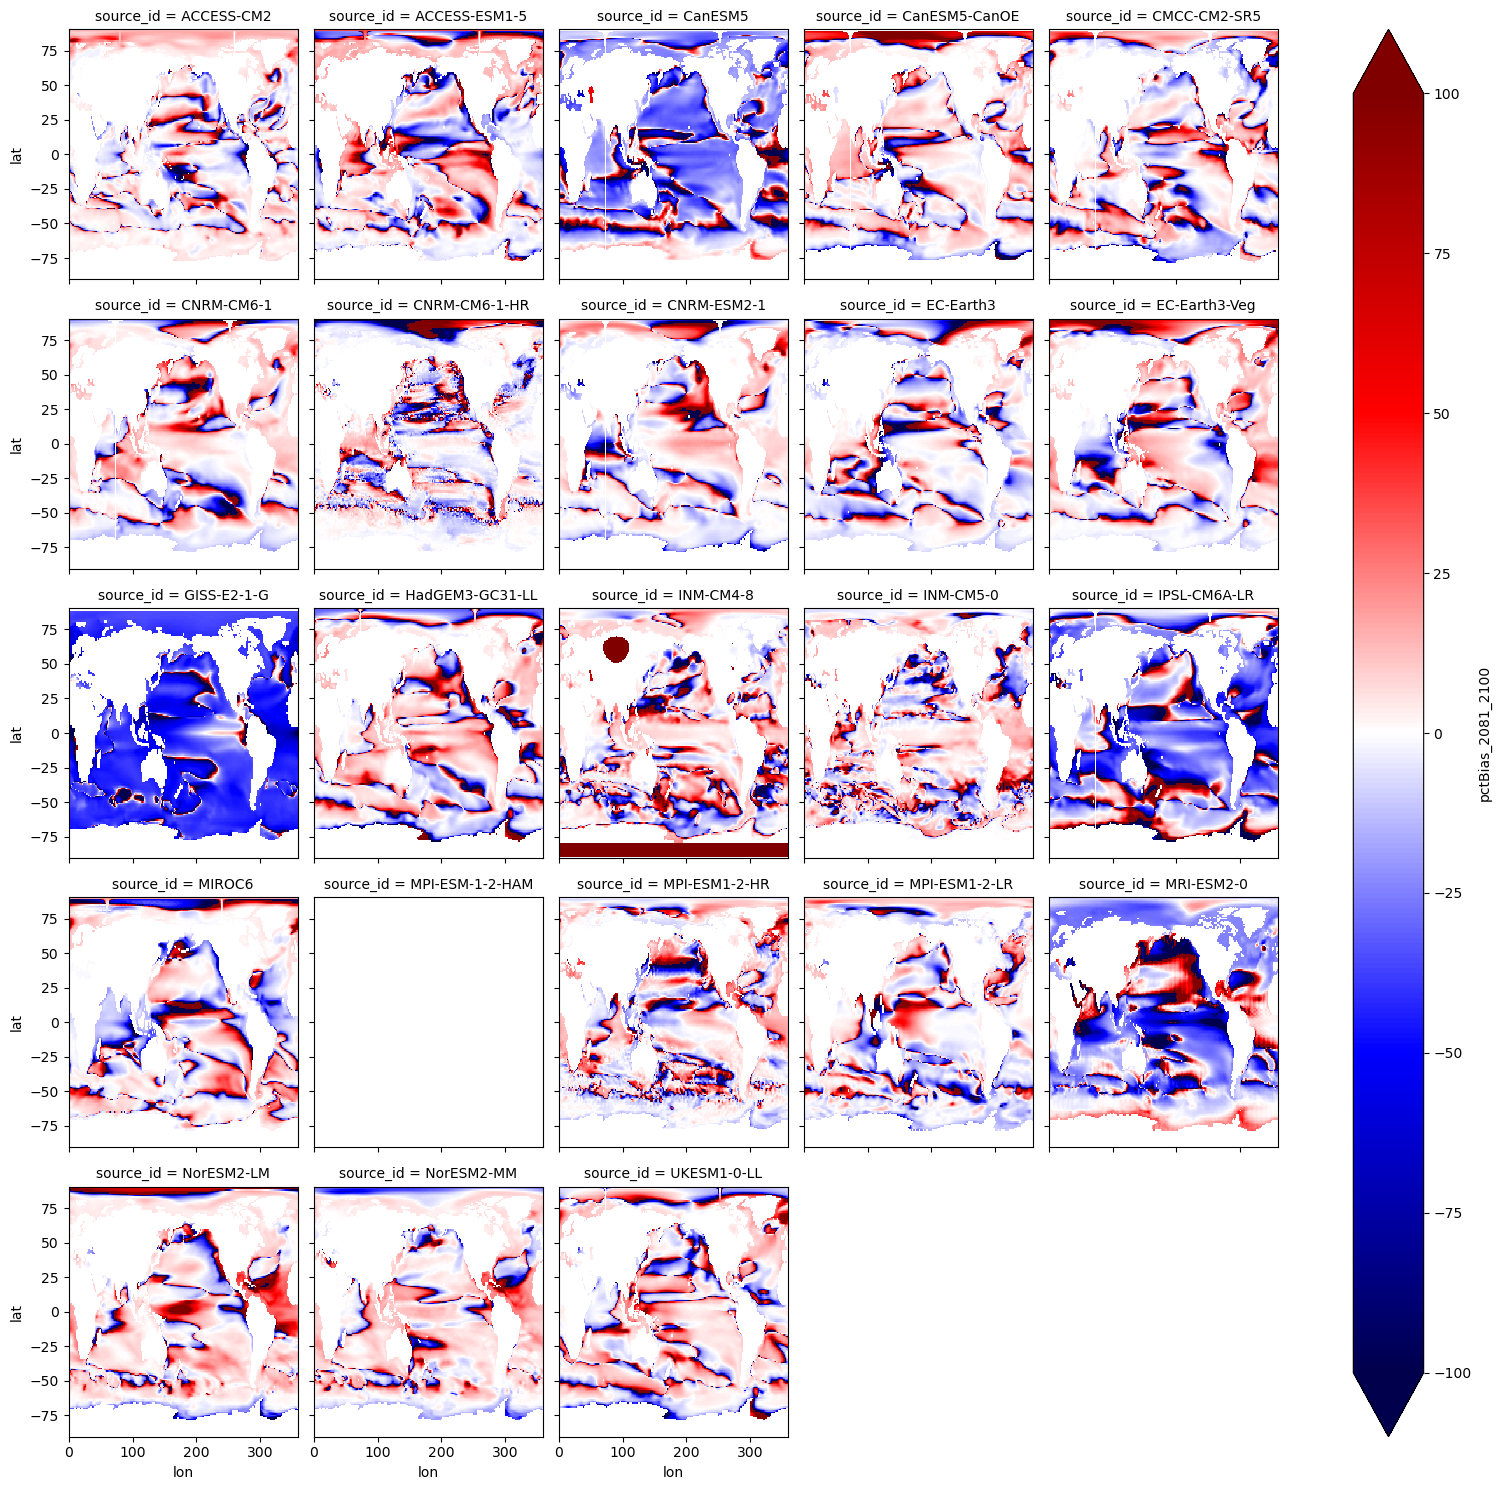

In [8]:
prediction_ds.pctBias_2081_2100.sel(ssp=ssp_to_plot).plot(col="source_id", col_wrap=5,vmin=-100,vmax=100,cmap='seismic')

Bias when predicting using regression coefficients fitted with all SSPs:

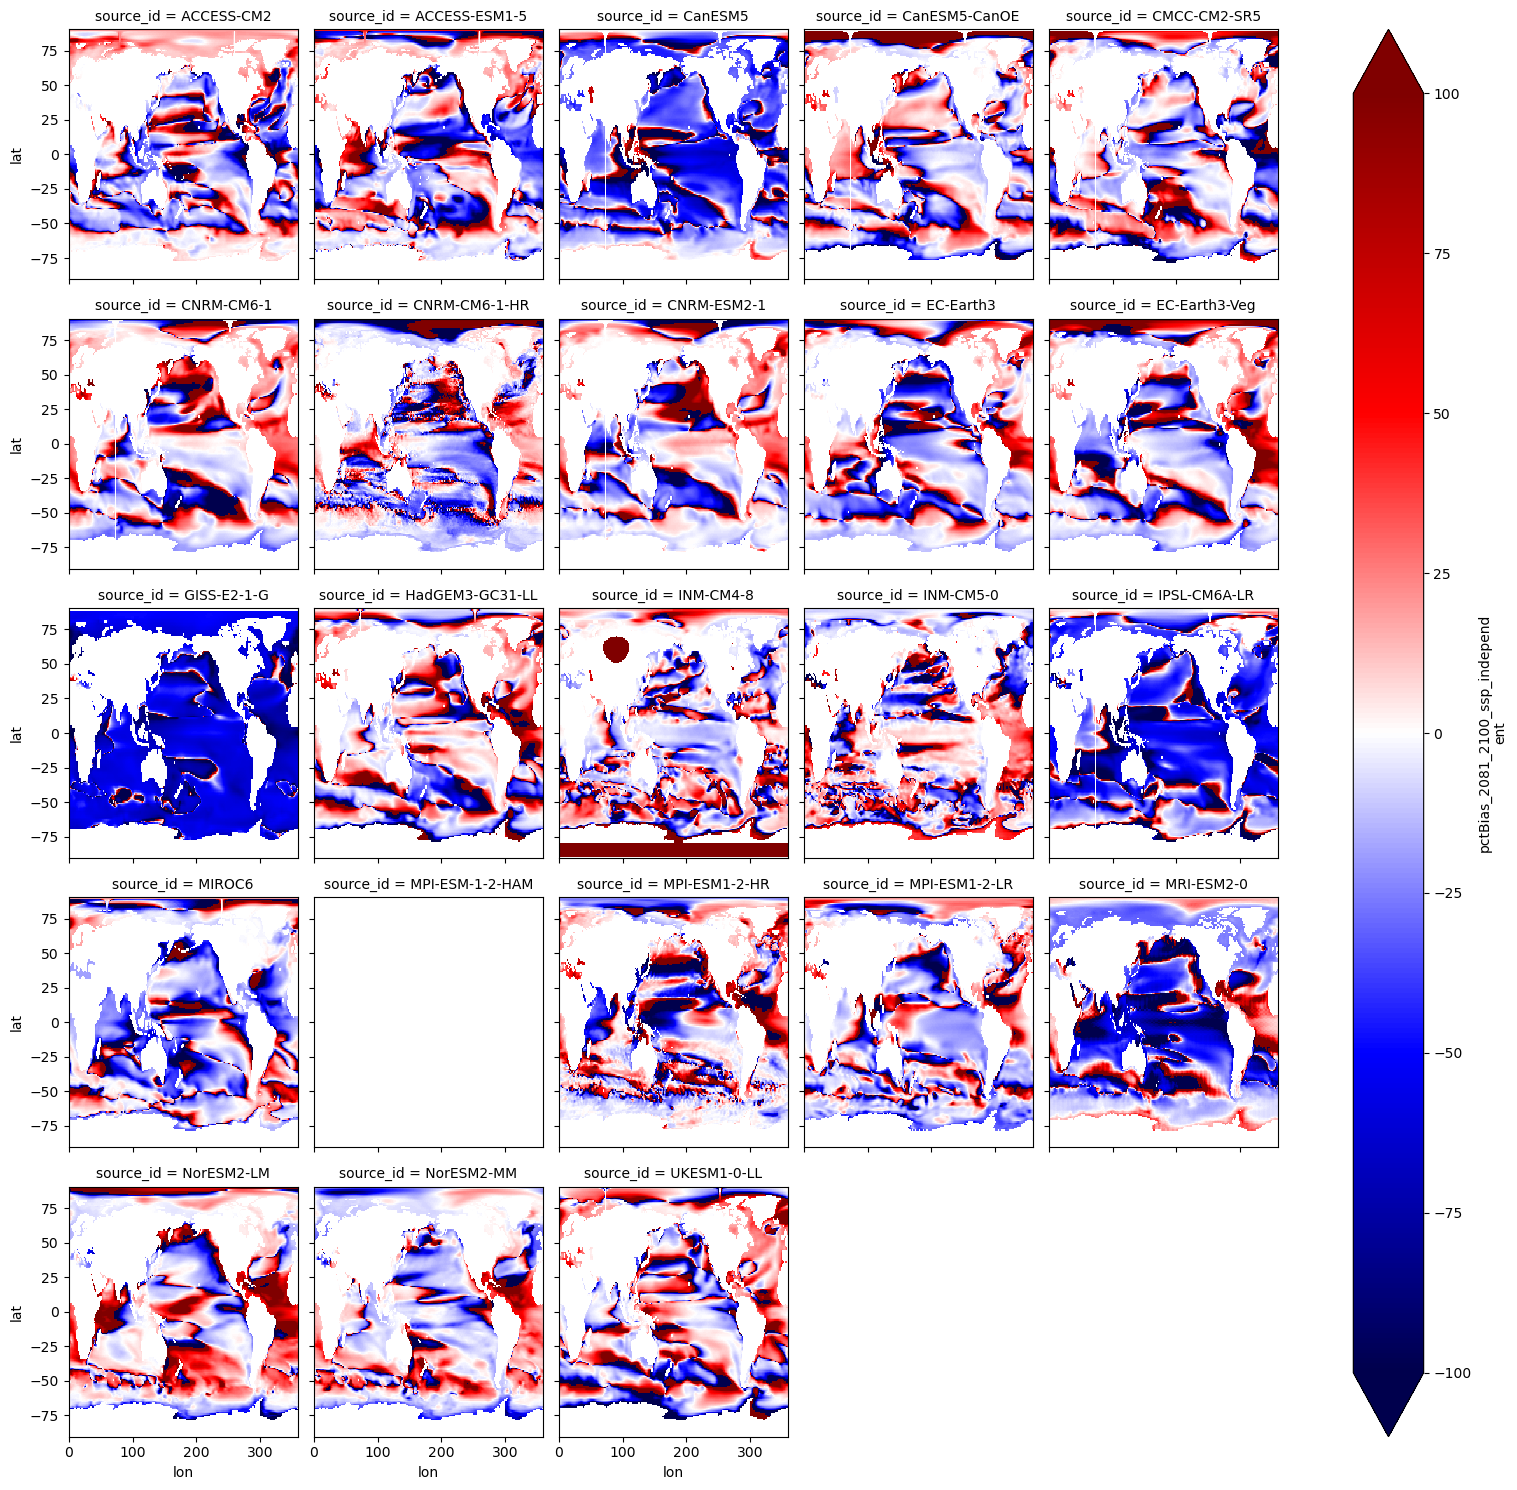

In [6]:
prediction_ds.pctBias_2081_2100_ssp_independent.sel(ssp=ssp_to_plot).plot(col="source_id", col_wrap=5,vmin=-100,vmax=100,cmap='seismic')

(!) **Note the larger than average biases for CanESM5, GISS-E2-1-G, IPSL-CM6A-LR and MRI-ESM2-0, these are models for which SSP1-2.6 and SSP5-8.5 run beyond 2100 and these longer simulations were used to estimate regression coefficients.**